In [1]:
import csv
import pandas
from matplotlib import pyplot as plt, ticker
import matplotlib.dates as mdates
from datetime import datetime
import re

PATREON_INCOME_FILE = "creator-analytics-detailed-earnings.csv"
ALIFEEE_SPENDING_FILE = "alifeee_spending.csv"

ONE_GBP_IN_EURO = 1.19 # £1 = €1.19 on 2024-07-12
ONE_GBP_IN_EURO = 1.19 # £1 = €1.19 on 2025-05-24


In [10]:
patreon_money = pandas.read_csv(PATREON_INCOME_FILE, parse_dates=[0])
patreon_money = patreon_money.drop(["Member name", "Member user ID", "Member email", "Event ID"], axis=1)
patreon_money

,Date,Event type,Event subtype,Description,Creator currency,Creator share,Creator platform fee,Creator payment processing fee,Creator currency conversion fee,Creator iOS app store fee,Creator equivalent of member tax,Currency conversion rate,Member currency,Member charge amount,Member tax amount
0,2025-05-23 18:39:27,Payment,Membership,jan suli,EUR,3.88,0.40,0.56,0.15,NaN,1.00,1189950.0,GBP,5.03,0.84
1,2025-05-23 18:39:02,Payment,Membership,jan lili,EUR,0.70,0.08,0.22,NaN,NaN,0.21,NaN,EUR,1.21,0.21
2,2025-05-23 18:33:12,Payment,Membership,jan suli,EUR,4.04,0.40,0.56,NaN,NaN,1.00,NaN,EUR,6.00,1.00
3,2025-05-23 18:09:31,Payment,Membership,jan suli,EUR,3.85,0.40,0.53,0.14,NaN,0.31,882002.0,USD,5.93,0.35
4,2025-05-22 18:26:48,Payment,Membership,jan suli,EUR,3.94,0.41,0.57,0.16,NaN,1.27,86835.0,NOK,73.16,14.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812,2021-07-01 02:31:22,Payment,Membership,jan lili,EUR,0.89,0.11,0.22,0.04,NaN,NaN,841852.0,USD,1.50,NaN
813,2021-06-01 12:57:50,Payment,Membership,jan mani,EUR,4.75,0.43,NaN,0.14,NaN,NaN,819144.0,USD,6.50,NaN
814,2021-06-01 12:31:29,Payment,Membership,jan mani,EUR,4.08,0.40,0.52,NaN,NaN,NaN,NaN,EUR,5.00,NaN
815,2021-06-01 06:53:22,Payment,Membership,jan lili,EUR,0.72,0.08,0.20,NaN,NaN,NaN,NaN,EUR,1.00,NaN


In [11]:
alifeee_money = pandas.read_csv(ALIFEEE_SPENDING_FILE, parse_dates=[0])
alifeee_money = alifeee_money.fillna(0)
alifeee_money

,Date ordered,IN/OUT (of alifeee),Name,From/To,SKU,Quantity,Total Price (£),Unit Price (£),alifeee's bank (£)
0,2024-01-01,IN,historical prints,0,nanpa-moku,1.0,0.00,0.00,0.00
1,2024-01-01,IN,historical prints,0,nanpa-kulupu,1.0,0.00,0.00,0.00
2,2024-01-14,IN,test prints,mixam,nanpa-sewi,4.0,18.49,4.62,-18.49
3,2024-01-14,IN,Envelopes,Post office,envelopes,10.0,4.00,0.40,-22.49
4,2024-01-14,IN,International stamps,Post office,stamps-international,4.0,8.80,2.20,-31.29
...,...,...,...,...,...,...,...,...,...
134,2025-03-17,OUT,nanpa kala p+p,patreon members,labels,3.0,0.00,0.00,0.00
135,2025-03-17,OUT,nanpa kala p+p,patreon members,nanpa-kala,47.0,0.00,0.00,0.00
136,2025-03-17,OUT,nanpa kala p+p,patreon members,stamps-international,42.0,0.00,0.00,0.00
137,2025-03-17,OUT,nanpa kala p+p,patreon members,stamps-2nd,5.0,0.00,0.00,0.00


In [12]:
patreon_money_by_month = patreon_money.resample("M", on="Date").agg({"Creator share": "sum"})
patreon_money_by_month = patreon_money_by_month.rename(columns={"Creator share": "Patreon creator share (€)"})
patreon_money_by_month

/tmp/ipykernel_14860/2050680900.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  patreon_money_by_month = patreon_money.resample("M", on="Date").agg({"Creator share": "sum"})


,Patreon creator share (€)
Date,
2021-06-30,10.42
2021-07-31,10.58
2021-08-31,19.53
2021-09-30,15.17
2021-10-31,10.73
2021-11-30,10.75
2021-12-31,10.88
2022-01-31,10.87
2022-02-28,11.93


In [13]:
# remove invoice money
alifeee_money = alifeee_money[alifeee_money["Name"] != "invoice money"]
alifeee_money_by_month = alifeee_money.resample("M", on="Date ordered").agg({"Total Price (£)": "sum"})
alifeee_money_by_month = alifeee_money_by_month.rename(columns={"Total Price (£)": "alifeee spending (£)"})
alifeee_money_by_month


/tmp/ipykernel_14860/351468549.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  alifeee_money_by_month = alifeee_money.resample("M", on="Date ordered").agg({"Total Price (£)": "sum"})


,alifeee spending (£)
Date ordered,
2024-01-31,31.29
2024-02-29,2.50
2024-03-31,55.00
2024-04-30,89.87
2024-05-31,143.59
2024-06-30,47.10
2024-07-31,117.49
2024-08-31,0.00
2024-09-30,169.74


In [14]:
alifeee_money_by_month["alifeee spending (£)"] = round(alifeee_money_by_month["alifeee spending (£)"] / ONE_GBP_IN_EURO, 2)
alifeee_money_by_month = alifeee_money_by_month.rename(columns={"alifeee spending (£)": "alifeee spending (€)"})
alifeee_money_by_month


,alifeee spending (€)
Date ordered,
2024-01-31,26.29
2024-02-29,2.10
2024-03-31,46.22
2024-04-30,75.52
2024-05-31,120.66
2024-06-30,39.58
2024-07-31,98.73
2024-08-31,0.00
2024-09-30,142.64


In [7]:
df = pandas.concat([patreon_money_by_month, alifeee_money_by_month], join="outer", axis=1)
df = df.fillna(0)
df


,Patreon creator share (€),alifeee spending (€)
2021-06-30,10.42,0.00
2021-07-31,10.58,0.00
2021-08-31,19.53,0.00
2021-09-30,15.17,0.00
2021-10-31,10.73,0.00
2021-11-30,10.75,0.00
2021-12-31,10.88,0.00
2022-01-31,10.87,0.00
2022-02-28,11.93,0.00
2022-03-31,7.85,0.00


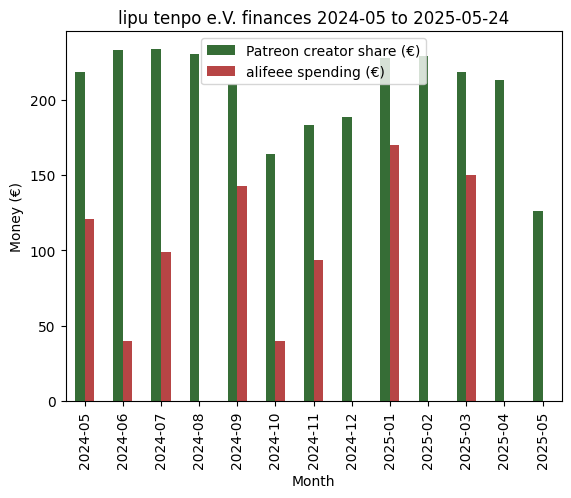

In [16]:
fig = plt.figure()
ax = fig.subplots()
df[datetime(2024,5,1):].plot.bar(ax=ax, color = ["#366D36", "#B74545"])

labels = ax.get_xticklabels()
labels = [re.search("([0-9]{4}-[0-9]{2})", label.get_text()).groups(0)[0] for label in labels]
# labels = [label for label in labels]
ax.set_xticklabels(labels, rotation=90, horizontalalignment="center")
ax.set_xlabel("Month")
ax.set_ylabel("Money (€)")
ax.set_title("lipu tenpo e.V. finances 2024-05 to 2025-05-24")
plt.show()


Patreon creator share (€)    2675.03
alifeee spending (€)          854.49
dtype: float64


/tmp/ipykernel_14860/3742627838.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


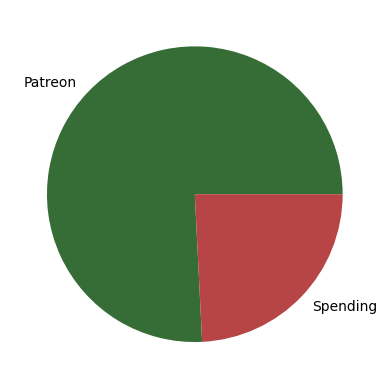

In [17]:
df_year = df[df.index > "2024-05"]

fig = plt.figure()
ax = fig.subplots(1,1)

patreon = df_year.sum()["Patreon creator share (€)"]
spending = df_year.sum()["alifeee spending (€)"]

print(df_year.sum())
ax.pie([patreon, spending], labels=["Patreon", "Spending"], colors = ["#366D36", "#B74545"])

fig.show()
